In [2]:
import pandas as pd
df = pd.read_csv("/content/Cardiotocographic.csv")  # or your original file name
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
# ===========================
#  CARDIOTOCOGRAPHIC EDA (EDA1)
# ===========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [5]:
#Load dataset  — make sure your uploaded filename matches exactly
df = pd.read_csv("Cardiotocographic.csv")

#Basic info
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isna().sum())

Shape: (2126, 14)

Data Types:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

Missing Values:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [6]:
#Convert numeric-like columns and impute missing with median
for col in df.columns:
    if df[col].dtype == 'object':
        coerced = pd.to_numeric(df[col], errors='coerce')
        if coerced.notna().sum() / len(coerced) > 0.9:
            df[col] = coerced

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

print("\nCleaned missing values summary:\n", df.isna().sum())


Cleaned missing values summary:
 LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


/tmp/ipython-input-1637863708.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [7]:
#Detect outliers (IQR method)
outlier_counts = {}
for col in numeric_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    mask = (df[col] < lower) | (df[col] > upper)
    outlier_counts[col] = mask.sum()

print("\nOutlier counts (per column):")
for k,v in outlier_counts.items():
    print(f"{k}: {v}")

# Remove outliers row-wise
outlier_mask = pd.DataFrame(False, index=df.index, columns=numeric_cols)
for col in numeric_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outlier_mask[col] = (df[col] < lower) | (df[col] > upper)

df_cleaned = df[~outlier_mask.any(axis=1)].reset_index(drop=True)
print("\nRows removed as outliers:", outlier_mask.any(axis=1).sum())
print("Cleaned data shape:", df_cleaned.shape)


Outlier counts (per column):
LB: 10
AC: 43
FM: 347
UC: 13
DL: 125
DS: 120
DP: 284
ASTV: 10
MSTV: 80
ALTV: 318
MLTV: 81
Width: 10
Tendency: 10
NSP: 559

Rows removed as outliers: 1230
Cleaned data shape: (896, 14)


In [8]:
#Statistical summary
summary = df.describe().T
summary["median"] = df.median()
summary["IQR"] = df.quantile(0.75) - df.quantile(0.25)
display(summary)

,count,mean,std,min,25%,50%,75%,max,median,IQR
LB,2126.0,133.340204,11.214379,51.842487,126.000000,133.000000,140.000000,214.000000,133.000000,14.000000
AC,2126.0,0.003204,0.004373,-0.019284,0.000000,0.001634,0.005606,0.038567,0.001634,0.005606
FM,2126.0,0.009894,0.067540,-0.480634,0.000000,0.000000,0.002567,0.961268,0.000000,0.002567
UC,2126.0,0.004391,0.003340,-0.014925,0.001851,0.004484,0.006536,0.030002,0.004484,0.004685
DL,2126.0,0.001895,0.003343,-0.015393,0.000000,0.000000,0.003289,0.030769,0.000000,0.003289
DS,2126.0,0.000002,0.000141,-0.001353,0.000000,0.000000,0.000000,0.002706,0.000000,0.000000
DP,2126.0,0.000173,0.000836,-0.005348,0.000000,0.000000,0.000000,0.010695,0.000000,0.000000
ASTV,2126.0,46.995984,18.813973,-63.000000,32.000000,49.000000,61.000000,162.000000,49.000000,29.000000
MSTV,2126.0,1.364378,1.173632,-6.600000,0.700000,1.200000,1.700000,13.800000,1.200000,1.000000
ALTV,2126.0,10.285964,21.205041,-91.000000,0.000000,0.000000,11.000000,182.000000,0.000000,11.000000


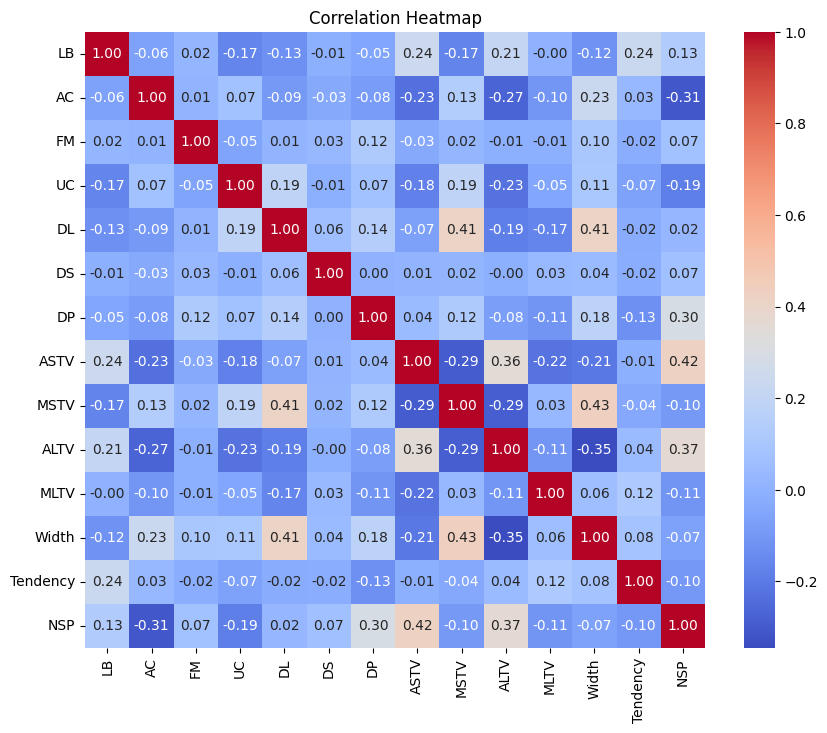

In [9]:
#Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

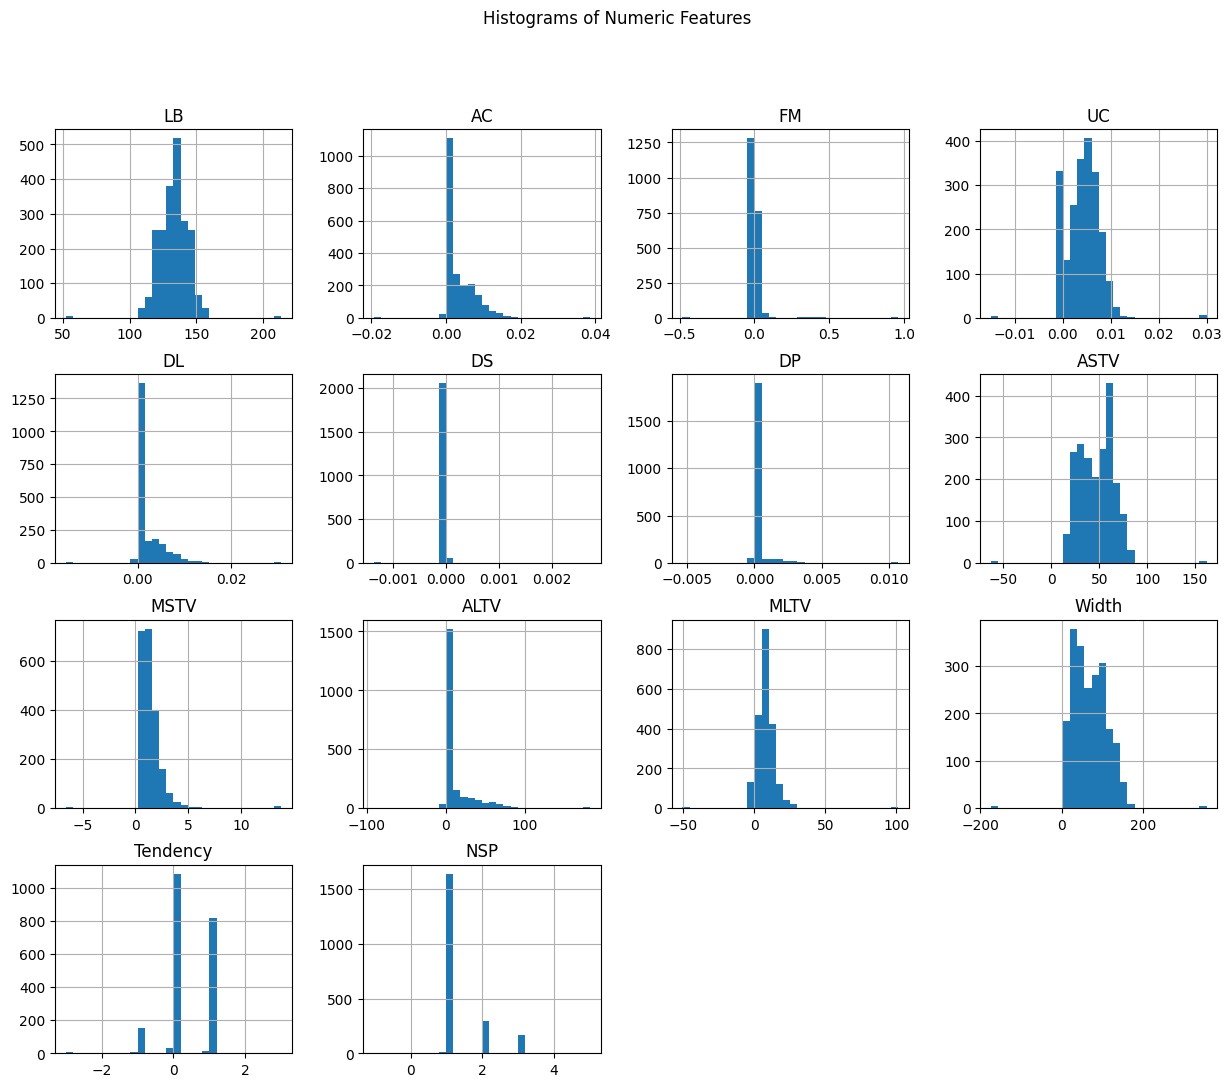

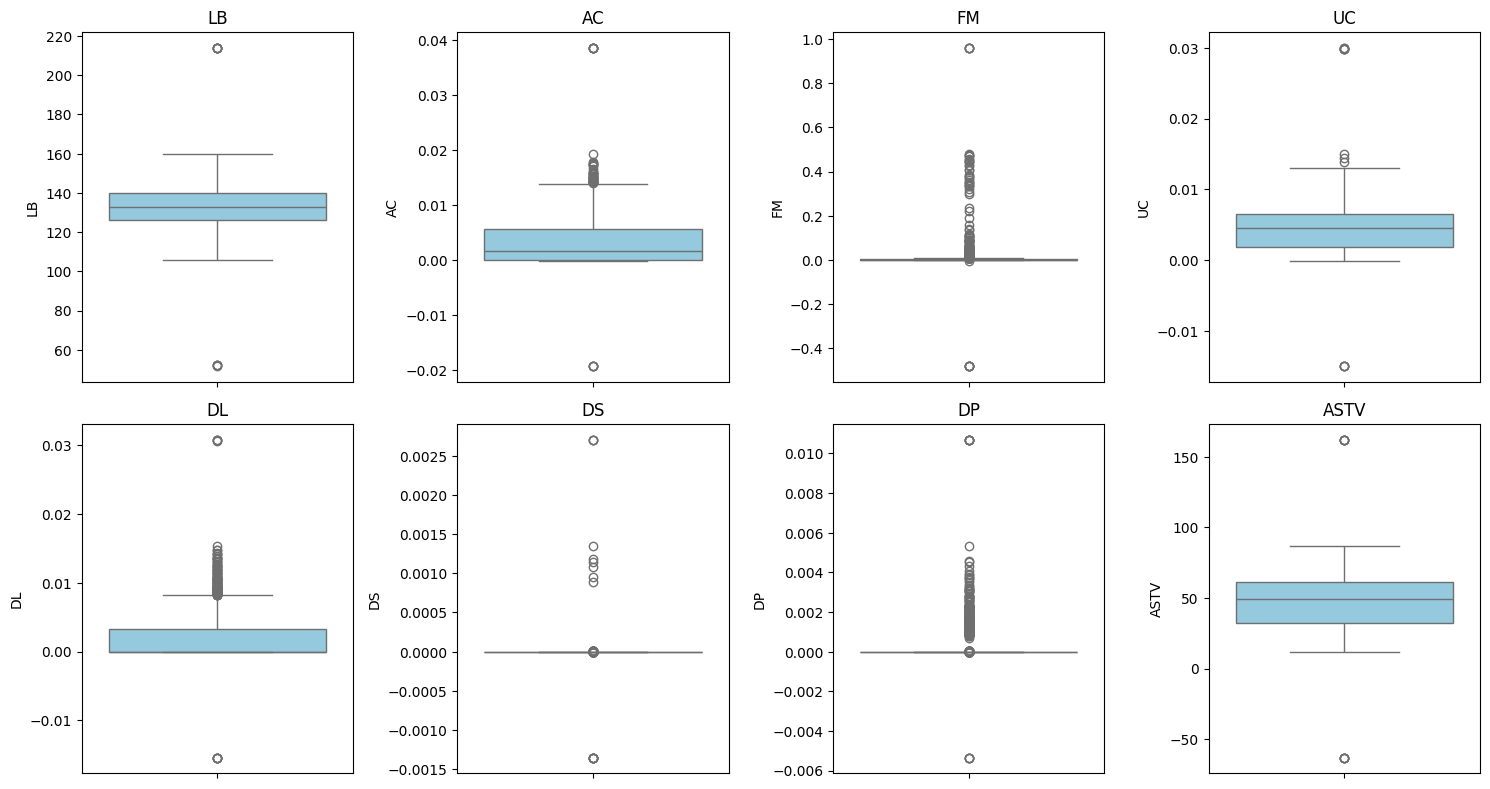

In [11]:
#Distribution plots
df[numeric_cols].hist(bins=30, figsize=(15,12))
plt.suptitle("Histograms of Numeric Features")
plt.show()

#Boxplots for key variables
plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_cols[:8], 1):
    plt.subplot(2,4,i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()

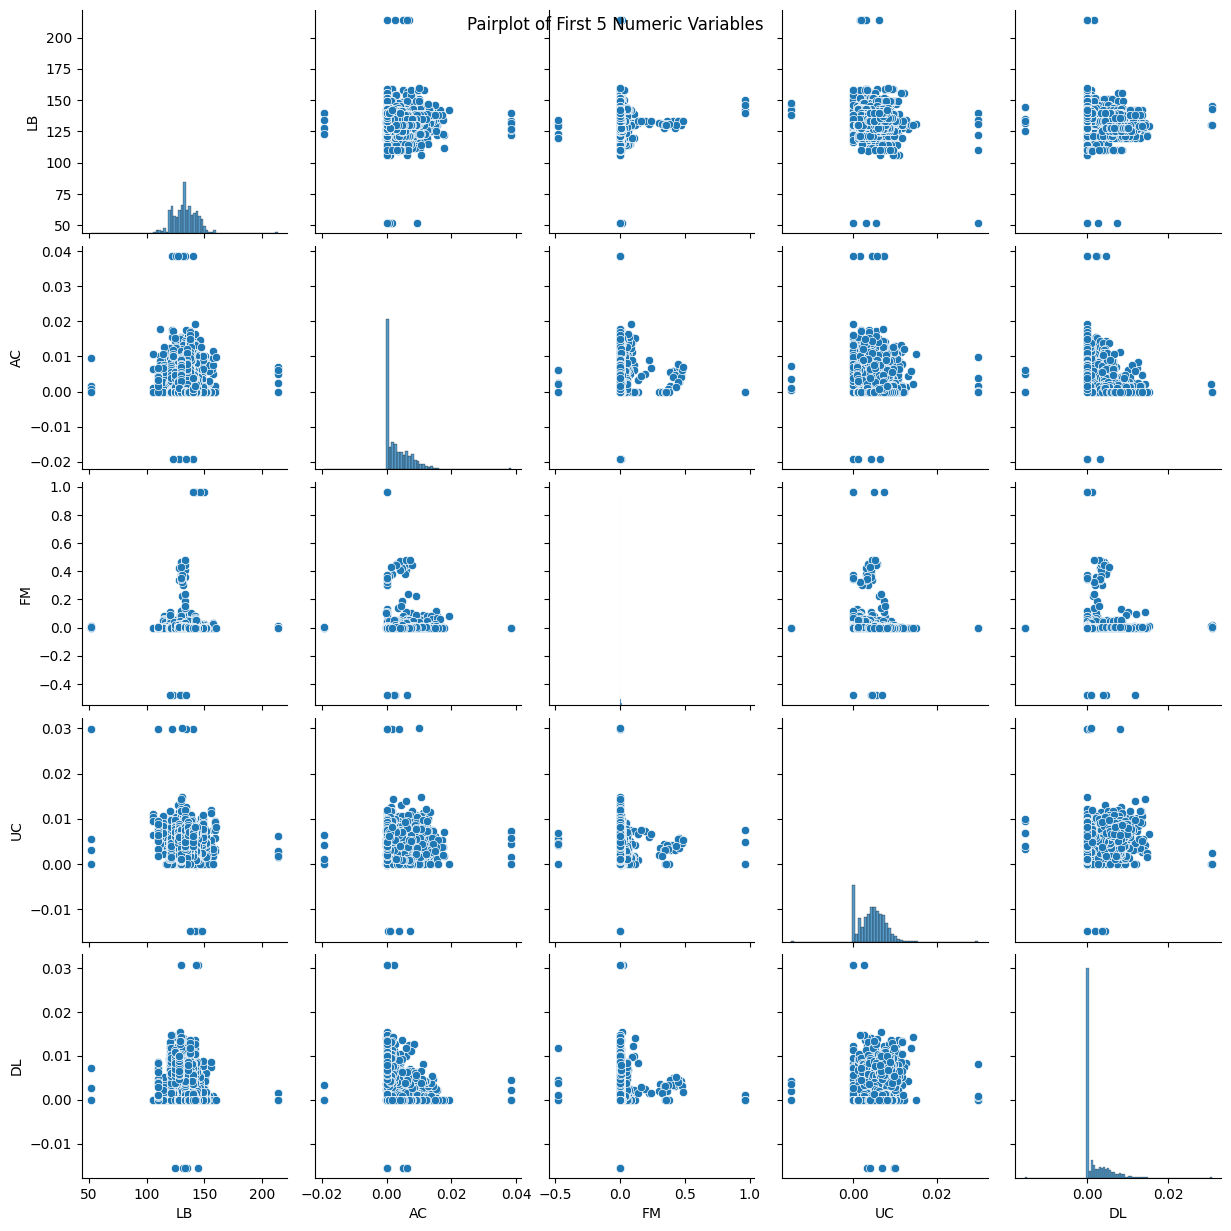

In [12]:
#Pairplot for first few numeric columns
sns.pairplot(df[numeric_cols[:5]])
plt.suptitle("Pairplot of First 5 Numeric Variables")
plt.show()

In [14]:
#Save cleaned dataset if you want
df_cleaned.to_csv("Cardiotocographic_cleaned.csv", index=False)
print("\n Cleaned dataset saved as Cardiotocographic_cleaned.csv")


 Cleaned dataset saved as Cardiotocographic_cleaned.csv
